In [1]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
from glob import glob
%matplotlib inline

In [105]:
root_dir = '/Volumes/data/Projects/Papers-Projects/FGO-Net/fig1'

In [106]:
def add_img_sal(img_dir, sal_dir, ratio=0.5):
    img = cv2.imread(img_dir)
    img = cv2.resize(img, (224, 224))
    
    gray_img = cv2.imread(sal_dir, cv2.IMREAD_GRAYSCALE) # gray img [0, 255]
    # gray_img[gray_img<128] = 0
    h,w = gray_img.shape
    img =  cv2.resize(img, (w, h), cv2.INTER_LINEAR)
    heat_img = cv2.applyColorMap(gray_img, cv2.COLORMAP_JET) # 注意此处的三通道热力图是cv2专有的GBR排列
    
    print(img.shape, heat_img.shape)
    img_add = cv2.addWeighted(img, ratio, heat_img, 1-ratio, 0)
    return img_add

In [107]:
def mdir(x):
    if not os.path.exists(x):
        os.makedirs(x)

## different layer

In [108]:
dst_dir = root_dir + '/ans'

In [109]:
img_dirs = f'{root_dir}/imgs'
fix_dirs = f'{root_dir}/fix'
sal_dirs = f'{root_dir}/sal'
# pred_dirs = f'{root_dir}/layer1'

In [110]:
# dst_dir = root_dir.replace('synthetic', 'add-synthetic')
# dst_dirs = f'{dst_dir}/layer1'
dst_dirs = dst_dir + '/sal'
mdir(dst_dirs)

In [111]:
img_dirs

'/Volumes/data/Projects/Papers-Projects/FGO-Net/fig1/imgs'

In [120]:
imgs = glob(f'{img_dirs}/*.jpeg')
len(imgs)

2

In [121]:
imgs[0]

'/Volumes/data/Projects/Papers-Projects/FGO-Net/fig1/imgs/syntheticData3.jpeg'

In [122]:
img_dir = imgs[1]
img_name = img_dir.split('/')[-1].split('.')[0]
cur_sal_dir = f'{sal_dirs}/{img_name}.jpg'
cur_dst_dirs = f'{dst_dirs}/{img_name}.png'

print(cur_sal_dir, cur_dst_dirs)

cur_img = add_img_sal(img_dir, cur_sal_dir, ratio=0.5)


/Volumes/data/Projects/Papers-Projects/FGO-Net/fig1/sal/syntheticData2.jpg /Volumes/data/Projects/Papers-Projects/FGO-Net/fig1/ans/sal/syntheticData2.png
(768, 1024, 3) (768, 1024, 3)


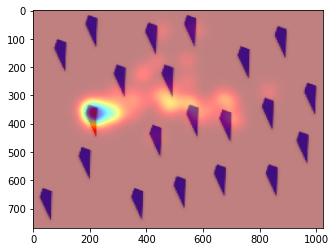

In [123]:
plt.imshow(cur_img)

In [124]:
cv2.imwrite(cur_dst_dirs, cur_img)

True

## differne sigma

In [ ]:
sal_dirs = [f'pred_{i}' for i in range(10)]
sal_dirs.append('gt_sal')

In [ ]:
sal_dirs

In [ ]:
for sal_dir in sal_dirs:
    dst = add_img_sal(img_dir, f'{root_dir}/{sal_dir}.png')
    dst_dir = f'{root_dir}/heatmap/{sal_dir}.png'
    cv2.imwrite(dst_dir, dst)

## fixmap

In [2]:
img_dir = '/Volumes/data/Projects/Papers-Projects/FGO-Net/高斯模糊图/img.jpg'

In [8]:
fix_dir = '/Volumes/data/Projects/Papers-Projects/FGO-Net/高斯模糊图/gt_fix.png'

In [4]:
img = cv2.imread(img_dir)

In [32]:
fix = cv2.imread(fix_dir, cv2.IMREAD_GRAYSCALE)

In [43]:
aug_fix = cv2.imread(fix_dir)

In [44]:
point_size = 5
point_color = (255, 255, 255) # BGR
thickness = -1 # 可以为 0 、4、8

# 要画的点的坐标
h, w = fix.shape



for i in range(h):
    for j in range(w):
        if fix[i, j] == 255:
            cv2.circle(aug_fix, (j, i), point_size, point_color, thickness)

In [45]:
img = img.astype(np.uint8)

In [46]:
dst_dir = '/Volumes/data/Projects/Papers-Projects/FGO-Net/高斯模糊图/gt_fix2.png'

In [47]:
cv2.imwrite(dst_dir, aug_fix)

True

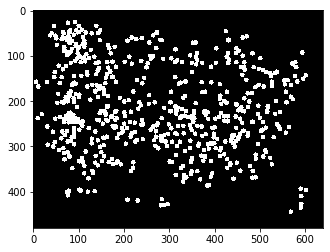

In [48]:
plt.imshow(aug_fix, cmap='gray')